# Data Science Regression Project: Predicting Home Prices

In [70]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.figure(figsize=(20,10))
import seaborn as sns

<Figure size 1440x720 with 0 Axes>

In [71]:
df = pd.read_csv("bengaluru_house_prices.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [72]:
df.shape

(13320, 9)

In [73]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

## Data Cleaning

In [74]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

**Drop features which are not needed**

In [75]:
df2 = df.copy()
df2 = df2.drop(['area_type','availability','society'], axis='columns')

In [76]:
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [77]:
df3 = df2.fillna(df2.median())

In [78]:
df3.isnull().sum()

location       1
size          16
total_sqft     0
bath           0
balcony        0
price          0
dtype: int64

In [79]:
df3 = df3.dropna()

In [80]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

## Feature Engineering

In [81]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

**We create a new feature called bhk so that everything remains in integer values**

In [82]:
df3['bhk'] = df3['size'].apply(lambda x : int(x.split(' ')[0]))

In [83]:
df3.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [84]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [85]:
df3[df3['bhk'] > 15]

,location,size,total_sqft,bath,balcony,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
3379,1Hanuman Nagar,19 BHK,2000,16.0,2.0,490.0,19
3609,Koramangala Industrial Layout,16 BHK,10000,16.0,2.0,550.0,16
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43
11559,1Kasavanhalli,18 Bedroom,1200,18.0,2.0,200.0,18


In [86]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [87]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [88]:
df3[~df3['total_sqft'].apply(is_float)].head(20)

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,2.0,2.0,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,2.0,2.0,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
224,Devanahalli,3 BHK,1520 - 1740,2.0,2.0,74.820,3
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,0.0,63.770,2


In [89]:
def convert_range_to_val(x):
    values = x.split('-')
    
    if len(values) == 2:
        return ((float(values[0]) + float(values[1]))/2)
    try:
        return float(x)
    except:
        return np.nan

**Remove range values from total_sqft column**

In [90]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_range_to_val)

In [91]:
df4.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
balcony        0
price          0
bhk            0
dtype: int64

In [92]:
df4 = df4.replace(to_replace='None', value=np.nan).dropna()

In [93]:
df4.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
bhk           0
dtype: int64

In [94]:
df4['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [95]:
df4.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


**Create new feature price per sq feet**

In [96]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']

In [97]:
df5.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


In [98]:
location = df5['location'].value_counts()
location

Whitefield                537
Sarjapur  Road            397
Electronic City           302
Kanakpura Road            271
Thanisandra               233
                         ... 
Madanayakahalli             1
Bull Temple Road            1
Vittal Mallya Road          1
Banashankari 6th Stage      1
6th Block Jayanagar         1
Name: location, Length: 1298, dtype: int64

In [99]:
df5['location'].value_counts()

Whitefield                537
Sarjapur  Road            397
Electronic City           302
Kanakpura Road            271
Thanisandra               233
                         ... 
Madanayakahalli             1
Bull Temple Road            1
Vittal Mallya Road          1
Banashankari 6th Stage      1
6th Block Jayanagar         1
Name: location, Length: 1298, dtype: int64

**locations which is a categorical variable. We need to apply dimensionality reduction to reduce number of locations**

In [100]:
location_less_than_10 = location[location<=10]
location_less_than_10

Ganga Nagar               10
Basapura                  10
Nagappa Reddy Layout      10
Dairy Circle              10
Thyagaraja Nagar          10
                          ..
Madanayakahalli            1
Bull Temple Road           1
Vittal Mallya Road         1
Banashankari 6th Stage     1
6th Block Jayanagar        1
Name: location, Length: 1058, dtype: int64

**Replace locations which have less than 10 data points with 'other'**

In [101]:
df5['location'] = df5['location'].apply(lambda x: 'other' if x in location_less_than_10 else x)

In [102]:
df5['location'].value_counts()

other                        2888
Whitefield                    537
Sarjapur  Road                397
Electronic City               302
Kanakpura Road                271
                             ... 
Doddaballapur                  11
Tindlu                         11
2nd Phase Judicial Layout      11
Bommenahalli                   11
Nehru Nagar                    11
Name: location, Length: 241, dtype: int64

In [103]:
df5.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


## Exploratory Data Analysis

/home/enrique/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


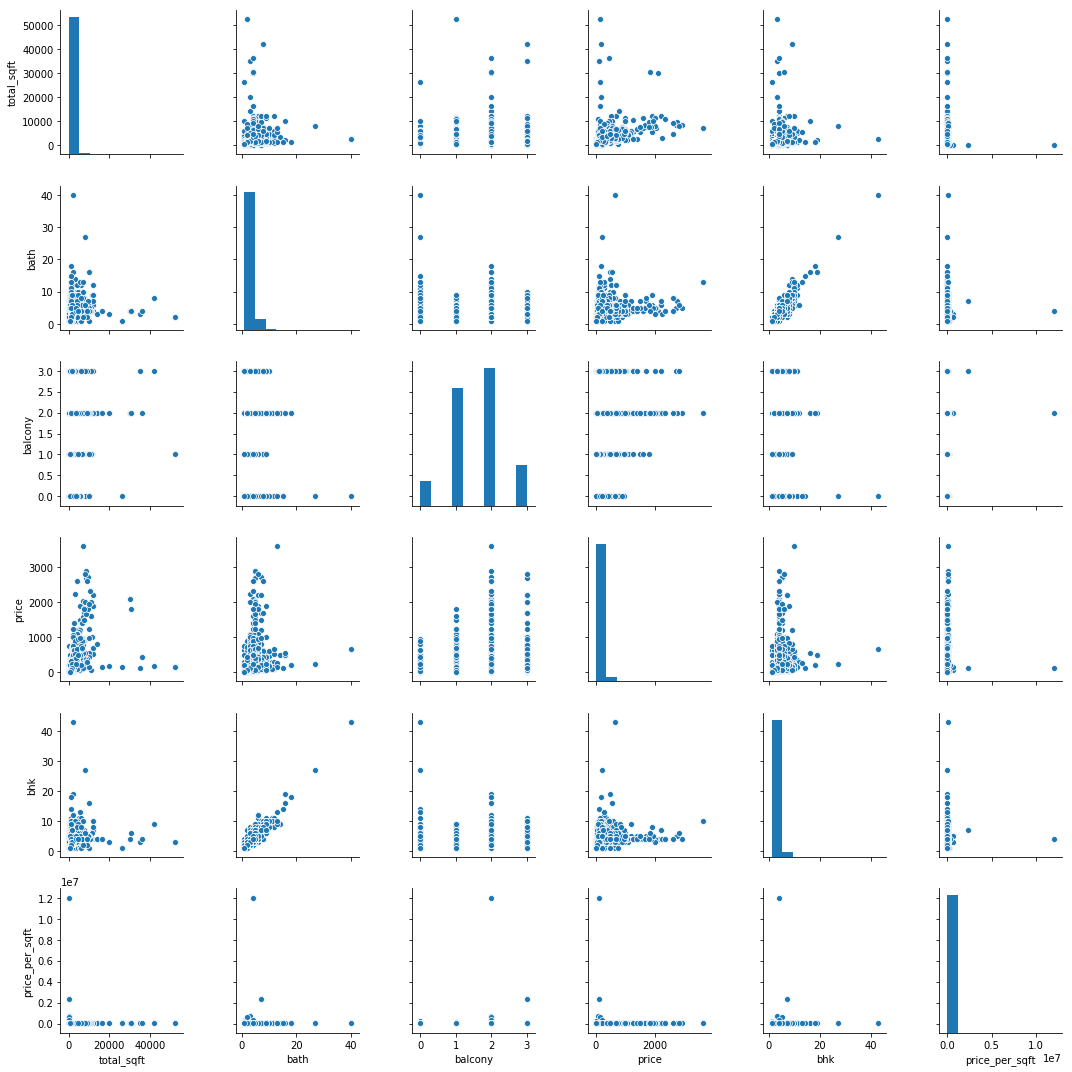

In [104]:
sns.pairplot(df5, size=2.5)
plt.tight_layout()

**Balcony doesn't affect the house price by a lot**

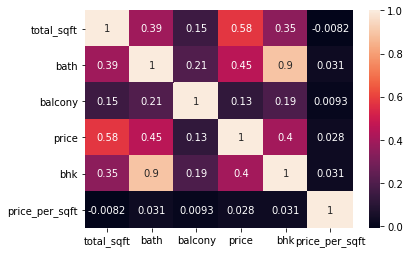

In [105]:
corrMatrix = df5.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

## Outlier Removal

**We can see in the plots that there are some data points where the 2bhk house cost more than the 3bhk house**

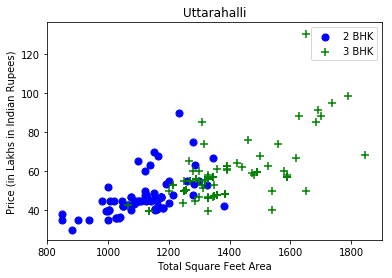

In [106]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (in Lakhs in Indian Rupees)")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df5,"Uttarahalli")

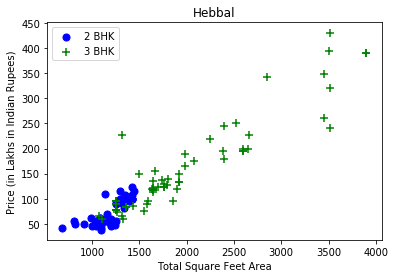

In [107]:
plot_scatter_chart(df5,"Hebbal")

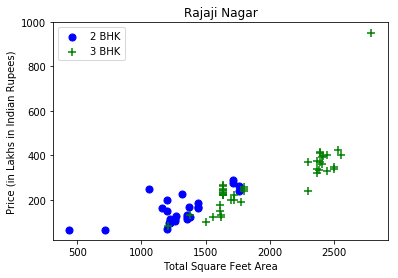

In [108]:
plot_scatter_chart(df5,"Rajaji Nagar")

In [109]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df['price_per_sqft']),
                'std': np.std(bhk_df['price_per_sqft']),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df['price_per_sqft']<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df5 = remove_bhk_outliers(df5)
df5.shape

(9212, 8)

In [110]:
df5.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,9212.000000,9212.000000,9212.000000,9212.000000,9212.000000,9.212000e+03
mean,1534.861647,2.691381,1.564590,126.885895,2.752171,9.234461e+03
std,955.156347,1.398372,0.793837,168.346891,1.357225,1.277300e+05
min,1.000000,1.000000,0.000000,8.000000,1.000000,5.000000e+02
25%,1080.000000,2.000000,1.000000,51.822500,2.000000,4.695286e+03
50%,1251.500000,2.000000,2.000000,80.000000,3.000000,6.076529e+03
75%,1702.000000,3.000000,2.000000,135.000000,3.000000,8.238726e+03
max,26136.000000,40.000000,3.000000,3600.000000,43.000000,1.200000e+07


In [111]:
df5.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000
6,Old Airport Road,4 BHK,2732.0,4.0,2.0,204.00,4,7467.057101


In [112]:
df5.shape

(9212, 8)

**Removes the extreme cases where the price per sq feet is either extremely high or extremely low**

In [113]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, temp_df in df.groupby('location'):
        m = np.mean(temp_df['price_per_sqft'])
        st = np.std(temp_df['price_per_sqft'])
        reduced_df = temp_df[(temp_df['price_per_sqft']>(m-st)) & (temp_df['price_per_sqft']<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df6 = remove_pps_outliers(df5)
df6.shape

(7714, 8)

In [114]:
df6.shape

(7714, 8)

**In a house, number of bathrooms cannot be greater than number of bedrooms+1, (Assuming that 1 extra for guest bathroom)**

In [115]:
df6[df6['bath'] > (df6['bhk']+2)]

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
1324,Chamrajpet,6 Bedroom,1500.0,9.0,3.0,230.0,6,15333.333333
1420,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.032520
3176,KR Puram,8 Bedroom,1200.0,12.0,2.0,110.0,8,9166.666667
4414,Nagasandra,4 Bedroom,7000.0,8.0,2.0,450.0,4,6428.571429
5665,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330
6653,other,9 Bedroom,3300.0,14.0,2.0,500.0,9,15151.515152
7431,other,3 Bedroom,2400.0,6.0,2.0,775.0,3,32291.666667
7639,other,4 Bedroom,4350.0,8.0,2.0,2600.0,4,59770.114943
7692,other,10 Bedroom,7150.0,13.0,2.0,3600.0,10,50349.650350


In [116]:
df7 = df6[~(df6['bath'] > (df6['bhk']+2))]

In [117]:
df7.shape

(7705, 8)

In [118]:
df7.head()

,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Devarachikkanahalli,2 BHK,1250.0,2.0,2.0,40.0,2,3200.000000
1,Devarachikkanahalli,2 Bedroom,1200.0,2.0,2.0,83.0,2,6916.666667
2,Devarachikkanahalli,2 BHK,1170.0,2.0,2.0,40.0,2,3418.803419
3,Devarachikkanahalli,3 BHK,1425.0,2.0,2.0,65.0,3,4561.403509
4,Devarachikkanahalli,2 BHK,947.0,2.0,2.0,43.0,2,4540.654699


In [119]:
df8 = df7.drop(['size','price_per_sqft'], axis='columns')

In [120]:
df8.head()

,location,total_sqft,bath,balcony,price,bhk
0,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2
1,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2
2,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2
3,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3
4,Devarachikkanahalli,947.0,2.0,2.0,43.0,2


## Data Preprocessing

In [121]:
dummies = pd.get_dummies(df8['location'])
dummies.head()

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
df9 = pd.concat([df8,dummies], axis='columns')
df9.head()

,location,total_sqft,bath,balcony,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,947.0,2.0,2.0,43.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
dummies = dummies.drop('other', axis='columns')

In [124]:
df9 = df9.drop('location', axis='columns')
df9.head()

,total_sqft,bath,balcony,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1250.0,2.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1200.0,2.0,2.0,83.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1170.0,2.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1425.0,2.0,2.0,65.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,947.0,2.0,2.0,43.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
df9.shape

(7705, 246)

In [126]:
data = df9.drop(['price'], axis='columns')
data.head()

,total_sqft,bath,balcony,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1250.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1200.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1170.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1425.0,2.0,2.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,947.0,2.0,2.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
labels = df9[['price']]
labels.head()

,price
0,40.0
1,83.0
2,40.0
3,65.0
4,43.0


## Model Building

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data, labels, test_size=0.25, random_state=1)

In [129]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [130]:
lin_reg.score(X_test, Y_test)

0.7549636129110283

In [131]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=1)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(data,labels)

,model,best_score,best_params
0,linear_regression,0.707863,{'normalize': True}
1,lasso,0.679415,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.675608,"{'criterion': 'mse', 'splitter': 'random'}"


**From the above values we can see that Linear Regression is the best perfroming model**

## Testing the Model

In [132]:
def predict_price(location,sqft,bath,balcony,bhk):    
    loc_index = np.where(data.columns==location)[0][0]

    x = np.zeros(len(data.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = balcony
    x[3] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lin_reg.predict([x])[0][0]

In [133]:
predict_price('Indira Nagar',1000, 0,2, 2)

134.27382777930717

In [134]:
predict_price('Indira Nagar',10000, 2,4, 6)

1338.8228521832154

In [135]:
predict_price('Rajaji Nagar',1000, 1,2, 2)

181.08676798188083

In [136]:
predict_price('Rajaji Nagar',3000, 1,3, 4)

438.1847785172019

## Export the Model to Pickle File

In [137]:
import pickle
with open('home_prices_model.pickle','wb') as f:
    pickle.dump(lin_reg,f)

## Export location and column information to a file

In [138]:
import json
columns = {
    'data_columns' : [col.lower() for col in data.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))